# Manav Gupta

## Research question/interests

In this project, I aim to find any trends in the U.S Police Shootings that have taken place from 2015-2022. My main focus would be on trends based on the shootings descriptions(if they were armed or not, use of body cams, if they were fleeing etc), race of the victim, the age of the victim, the states in which the shootings occurred and whether any events in 2015-2022 impacted the trends in number of shotings. Additionally, I will focus more on the trends between unarmed victims and other factors, since having a weapon gives the police the right to defend themselves and therefore, it could be difficult to evaluate the siuations.

Therefore, my **research questions** are: 
1. How many unarmed victims were shot?
1. Are there any trends between trends between the race & age of the victims and the number of shootings ocurred?
1. Where (in which states) did the shootings occur?
1. Have the number of shootings in the United States decrease from 2015 - 2022?




![US MAP](../images/1920px-Police_killings_in_the_USA_in_2018.svg.png)


# Task 1 : Exploratory Data Analysis (EDA) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
raw_data = pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
raw_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

As we can see, there are hardly any null values in the dataset which shows that the data collected is complete and reliable however, in some cases we can observe that few of the values are null. This causes uncertainty and we will analyse data with null values separately. 

In [ ]:
raw_data.shape

(7729, 17)

The dataset has **7729 entries from 2015-2022.** This is very helpful since more entries gives a greater chance of creating trends that are more reliable and accurate. These entries would give a wide range of data which could be used to analyse the trends and provide answers to our research questions. 



In [ ]:
raw_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

Here as we can see that, there are various different columns present in the dataset however, not only columns would be needed to analyse the data. Columns  like **'longitiude', 'latitude', 'is_geocoding_exact'** do not provide us with much value therefore, we can probably remove them from the dataset. 

In [ ]:
raw_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


We will look into the amount of null values/missing values present in the dataset. The bar graph below shows the number if null vaues in each column of the dataset.

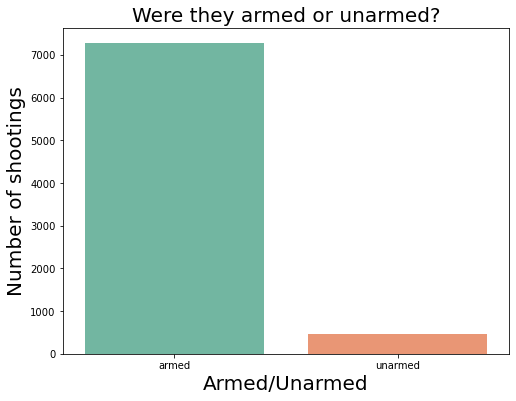

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(8,6))
s = sns.countplot(data = shootings_data, x='armed/unarmed',order=shootings_data["armed/unarmed"].value_counts().index,palette = "Set2").set_title("Were they armed or unarmed?",fontsize=20)
s.axes.set_xlabel("Armed/Unarmed",fontsize=20)
s.axes.set_ylabel("Number of shootings",fontsize=20)
plt.savefig("eda2.png", dpi=300, bbox_inches='tight',facecolor="white")

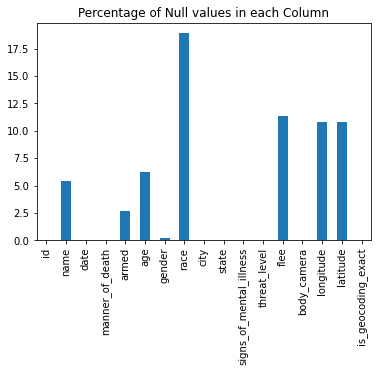

In [ ]:
import matplotlib.pyplot as plt
data =  pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
null = data.isnull().sum()/data.shape[0]*100
null.plot(kind='bar')
plt.title("Percentage of Null values in each Column")
plt.savefig("eda1.png", dpi=300, bbox_inches='tight',facecolor="white")
plt.show()


Since, we see there are a number of missing values in the dataset, we will remove all the null values to make a clean dataset with all values present. This could change the shape of the datatset as we can see below however, this makes it more accurate and reliable reuslts since all columns and data have appropriat data now. 

In [ ]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame()


After dropping null values, the shape of the Dataset is (5070, 17)
After dropping null values, null values of the Dataset :


,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


# Task 2: Data Analysis Pipeline

First, I will clean the data. I will remove columns that would not help in the analysis such as id, longitiude, latitude and geocoding.

In [ ]:
clean_data = raw_data.drop(['id','longitude','latitude','is_geocoding_exact'], axis=1)
clean_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False
7725,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False
7726,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False
7727,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False


Since we can observe that it could difficult to understand the abbreviations of the states therefore, we will make a dictionary to replace the values of the column with full forms. 

In [ ]:
states = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
        'DC': 'District of Columbia',
        'MP': 'Northern Mariana Islands',
        'PW': 'Palau',
        'PR': 'Puerto Rico',
        'VI': 'Virgin Islands',
        'AA': 'Armed Forces Americas (Except Canada)',
        'AE': 'Armed Forces Africa/Canada/Europe/Middle East',
        'AP': 'Armed Forces Pacific'
        }

Here, we not only replace the states but also replace and rename other columns to make it easier to understand and more organized to perform analysis on.

In [ ]:

data["State"] = data["state"].replace(states)
data["date"] = pd.to_datetime(data["date"])
data["Year"] = data["date"].dt.year
data["manner_of_death"].replace({"shot":"Shot", "shot and Tasered":"Shot and Tasered"}, inplace = True)
data["armed"].replace({"gun":"Gun", "knife":"Knife", "unarmed":"Unarmed", "undetermined":"Undetermined", "vehicle":"Vehicle", "toy weapon":"Toy Weapon", "unknown weapon":"Unknown Weapon", "machete":"Machete"}, inplace = True)
data["gender"].replace({"M":"Male", "F":"Female"}, inplace = True)
data["signs_of_mental_illness"].replace({True:"Abnormal", False:"Normal"}, inplace = True)
data["body_camera"].replace({True:"Available", False:"Not Available"}, inplace = True)
data["race"].replace({"W":"White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Native", "O":"Other"}, inplace = True)
data["threat_level"].replace({"attack":"Attack", "other":"Not Attack", "undetermined":"Unknown"}, inplace = True)
data["flee"].replace({"Not fleeing":"Not Fleeing", "Other":"Unknown"}, inplace = True)
data.rename(columns={"name": "Name","date": "Date","manner_of_death": "Manner Of Death","armed":"Armed","age":"Age","gender":"Gender","race":"Race","city":"City","state": "State Code","signs_of_mental_illness":"Mental Illness","threat_level":"Threat Level","flee":"Flee","body_camera":"Footage"}, inplace = True)
data = data[["Year","City","State", "State Code","Name","Age","Gender","Race","Mental Illness","Armed","Threat Level","Manner Of Death","Flee","Footage"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head()

After preprocessing, let's have a glimpse of the final dataset :


,Year,City,State,State Code,Name,Age,Gender,Race,Mental Illness,Armed,Threat Level,Manner Of Death,Flee,Footage
0,2015,Shelton,Washington,WA,Tim Elliot,53.0,Male,Asian,Abnormal,Gun,Attack,Shot,Not Fleeing,Not Available
1,2015,Aloha,Oregon,OR,Lewis Lee Lembke,47.0,Male,White,Normal,Gun,Attack,Shot,Not Fleeing,Not Available
2,2015,Wichita,Kansas,KS,John Paul Quintero,23.0,Male,Hispanic,Normal,Unarmed,Not Attack,Shot and Tasered,Not Fleeing,Not Available
3,2015,San Francisco,California,CA,Matthew Hoffman,32.0,Male,White,Abnormal,Toy Weapon,Attack,Shot,Not Fleeing,Not Available
4,2015,Evans,Colorado,CO,Michael Rodriguez,39.0,Male,Hispanic,Normal,nail gun,Attack,Shot,Not Fleeing,Not Available


In [ ]:
shootings_data = clean_data.drop(['name'],axis=1)
shootings_data.head()


,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Here, I'm trying to focus on whether the victim was armed or not and if the police had no choice but to shoot the victim. 
Therefore, I will create a new column that will access the danger level of the victim. This would be based in regards to these specific columns (armed, threat_level, signs of mental illness)

In [ ]:
shootings_data.armed.value_counts()

gun                               4407
knife                             1108
unarmed                            456
undetermined                       313
vehicle                            276
                                  ... 
pen                                  1
chainsaw                             1
gun and sword                        1
claimed to be armed                  1
knife, hammer and gasoline can       1
Name: armed, Length: 104, dtype: int64

In [ ]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

Since there are so many various weapons that the victims possess, we will divide it into weather the victim was armed or not and even change the column name to 'armed/unarmed'.

In [ ]:
weapons_type = list(shootings_data['armed'].unique())

weapons_type.remove('unarmed')

def weapon(armed):
    if armed in weapons_type:
        return 'armed'
    else:
        return 'unarmed'
    
shootings_data['armed'] = shootings_data['armed'].apply(weapon)
shootings_data = shootings_data.rename(columns={'armed': 'armed/unarmed'})
shootings_data['armed/unarmed'].describe()

count      7729
unique        2
top       armed
freq       7273
Name: armed/unarmed, dtype: object

As mentioned in my research question, I would focus more on the unarmed victims therefore, making edits to the armed column will help me make better observations in the dataset. 

In [ ]:
import project_functions2 as p2
df = p2.load_and_process("../data/US Police shootings in from 2015-22 2.csv")
df

,Name,Date,Manner of Death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,Daniel Raymond Honeycutt,2022-06-10,shot,gun,38.0,M,W,Elizabethton,TN,False,other,Not fleeing,False
7492,Derrick D. Clark,2022-06-18,shot,gun,24.0,M,B,Milwaukie,OR,False,other,Car,False
7500,Frank Baty,2022-06-19,shot,toy weapon,58.0,M,B,Albuquerque,NM,True,other,Not fleeing,False
7691,Samuel Paul Ranson,2022-08-27,shot,gun,50.0,M,W,Charleston,WV,False,attack,Not fleeing,False


# Task 4: Data Analysis

## Shooting descriptions

First, we will focus on the shooting descriptions. Using the processed data above, I will find out how many victims were armed and try to understand why the police had to shoot them. We'll find out the different manners in which the victims were killed.

### Manner of death

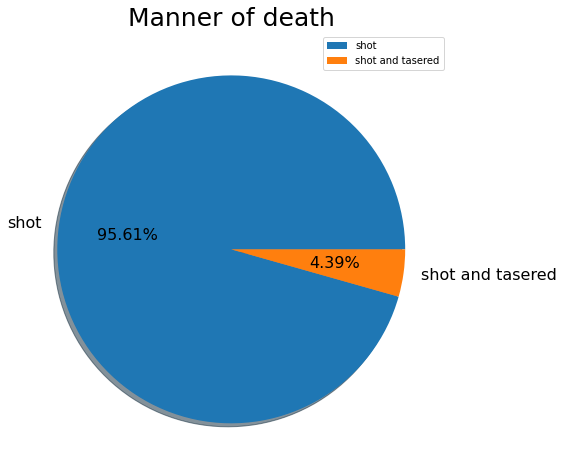

shot                7390
shot and Tasered     339
Name: manner_of_death, dtype: int64


In [ ]:

plt.figure(figsize=(8,8))
plt.pie(raw_data.manner_of_death.value_counts(), labels=['shot', 'shot and tasered'],autopct='%1.2f%%', shadow = True,textprops=dict(size= 16, color= "black"))
plt.title("Manner of death",fontsize=25)
plt.legend()
plt.show()
print(raw_data.manner_of_death.value_counts())


With the data visualization above, we can observe that the US police either shot or shot and tasered the vcitims. Over **95.61%** of these victims were shot while the other were shot and tasered. However, over 10% of the victims were unarmed (data shown above) and there should have been a good justification for the police to shoot them. They could either be fleeing or maybe tried to attack the police without the use of weapons therefore, they required to shoot them in that moment.

To further analyse if the police were right in their approach, we will look into whether the **unarmed victims** were fleeing or not. First we will visualize all the victims and then dig deeper to analyse only the unarmed victims. 

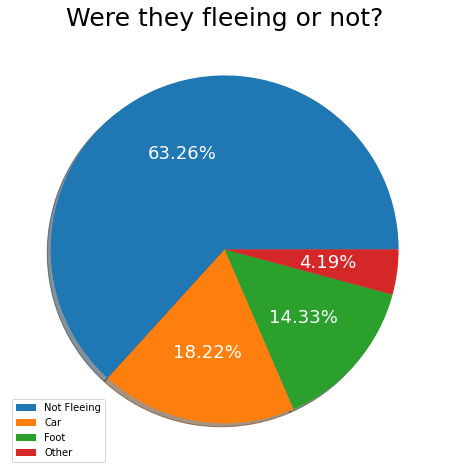

Not fleeing    4336
Car            1249
Foot            982
Other           287
Name: flee, dtype: int64

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(raw_data.flee.value_counts(), labels=['Not Fleeing', 'Car', 'Foot', 'Other'],autopct='%1.2f%%',shadow = True,textprops=dict(size= 18, color= "white"))
plt.legend()
plt.title("Were they fleeing or not?",fontsize=25)
plt.show()
raw_data.flee.value_counts()

### How many unarmed victims fled the scene?

Text(0, 0.5, 'Number of shootings')

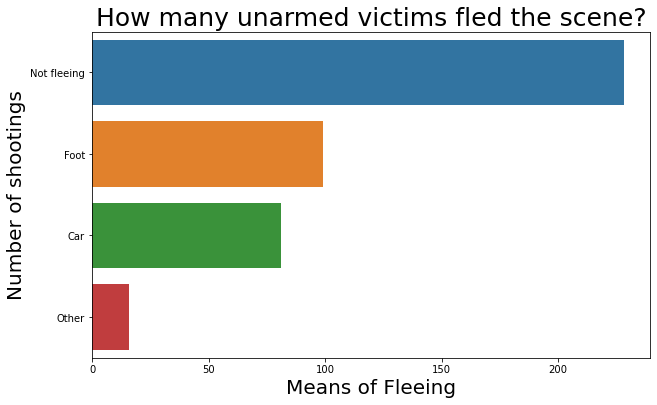

In [ ]:
import seaborn as sns
mydata = shootings_data[shootings_data['armed/unarmed']=='unarmed']
plt.subplots(figsize=(10,6))
p=sns.countplot(data=mydata, y='flee', order=mydata["flee"].value_counts().index,).set_title("How many unarmed victims fled the scene?",fontsize=25)
p.axes.set_xlabel("Means of Fleeing",fontsize=20)
p.axes.set_ylabel("Number of shootings",fontsize=20)



Now, here we can see that around 250 victims were unarmed and not fleeing, yet they were still shot. This shows inconsistencies with the power the police holds and how they are supposed to use it. We still do not know the whole story therefore, can not assume that the police was wrong in doing so since there are databases that consists of the description of the shooting and it also has the statement of the police and any witnesses. We do not have access to these databases therefore, cannot analyse the whole situation and have to make hence, make assumptions. 

Now, we will look into if the police had body cams on them when the shootings of the unarmed victims occured. 

### Were the police wearing body cams?

Let's have a look on the occurances' visual document recordings :


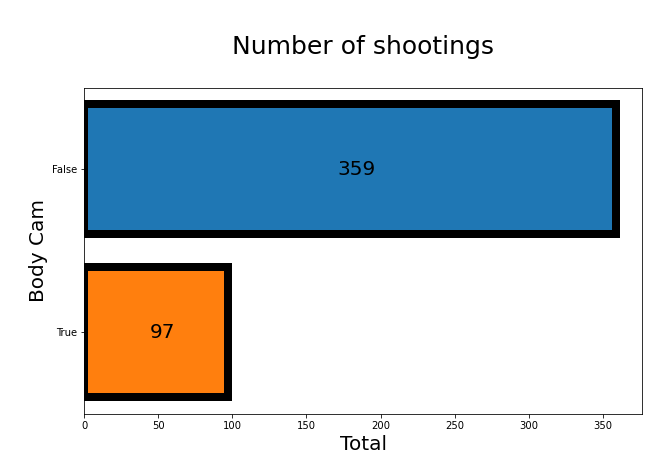

In [ ]:
print("Let's have a look on the occurances' visual document recordings :")
plt.subplots(figsize=(10, 6))
p=sns.countplot(y=mydata["body_camera"],order=mydata["body_camera"].value_counts().index, saturation=1, edgecolor = "black", linewidth = 8)
p.axes.set_title("\nNumber of shootings\n",fontsize=25)
p.axes.set_ylabel("\nBody Cam",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=20,color="black")

plt.show()

Here, we can observe that 359 shootings took place where the victims were unarmed and there was no body cam. There is no way to prove the credibility of the police in this case therefore, it should be made a compulsion to where body cams so that there is evidence and crediblilty and the situation could be acessed way better. 

## Race & Age 

Now, we will analyse the race of the unarmed victims and loook for any trends between the race of the victim and the number of killings. Again here we will use unarmed victims since there should technically we no reason to shoot them. However, we can not to be sure since we do not have access the statement of the police or any witnesses. 

Let's have a look on the ratio of victims' race :


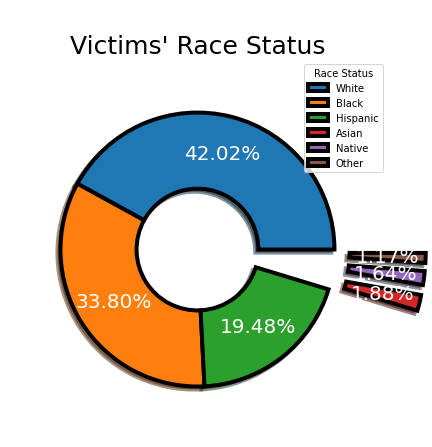

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
print(f"Let's have a look on the ratio of victims' race :")
plt.subplots(figsize=(7, 7))

labels = "White","Black","Hispanic","Asian","Native","Other"
size = 0.5

wedges, texts, autotexts = plt.pie([mydata["race"].value_counts().values[0],
                                    mydata["race"].value_counts().values[1],
                                    mydata["race"].value_counts().values[2],
                                    mydata["race"].value_counts().values[3],
                                    mydata["race"].value_counts().values[4],
                                    mydata["race"].value_counts().values[5]],
                                    explode = (0,0,0,0.6,0.6,0.6),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title = "Race Status")
plt.title("\nVictims' Race Status",fontsize=25)
plt.savefig("race1.png", dpi=300, bbox_inches='tight',facecolor="white")
plt.show()


Let's have a look on the victims' race status :


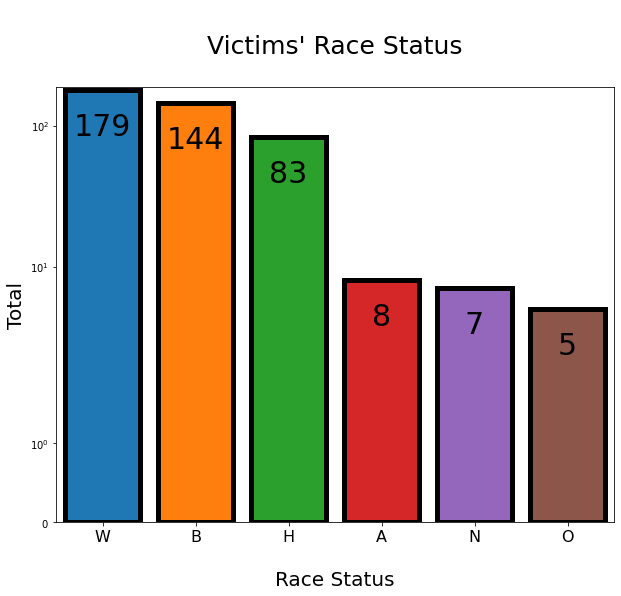

In [ ]:
print("Let's have a look on the victims' race status :")
plt.subplots(figsize=(10, 8))
p=sns.countplot(x=mydata["race"],order=mydata["race"].value_counts().index, saturation=1, edgecolor = "black", linewidth = 5)
p.axes.set_yscale("symlog")
p.axes.set_title("\nVictims' Race Status\n",fontsize=25)
p.axes.set_xlabel("\nRace Status",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0,fontsize=16)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black")

plt.savefig("race2.png", dpi=300, bbox_inches='tight',facecolor="white")
plt.show()


With the above visusals and data, we can observe that most unarmed victims were White followed by Black and Hispanics. In most cases,these do not necessarily show any trends since most the number of shooting of each race coincides with the population of the race in the country. However, we can see that almost 35% of the unarmed victims were black which is more than twice the population of black people in the country. The graphic below can prove the same.

![Population of the Race in the U.S](../images/USpop.png)

We will now observe and find any trends between the age of the unarmed victims and the number of shootings in the U.S.

Let's have a look on the distribution of victims' age :


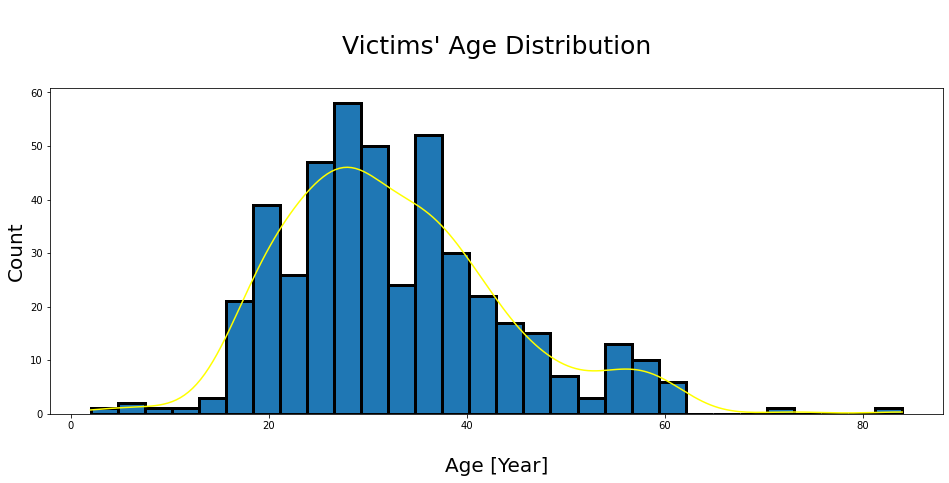

In [ ]:
print(f"Let's have a look on the distribution of victims' age :")
plt.subplots(figsize=(16, 6))
p = sns.histplot(data=mydata,x="age",multiple="stack",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("yellow")
p.axes.set_title("\nVictims' Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge [Year]",fontsize=20)
plt.savefig("age.png", dpi=300, bbox_inches='tight', facecolor="white")
plt.show()

Let's have a look on the distribution of genderwise victims' age :


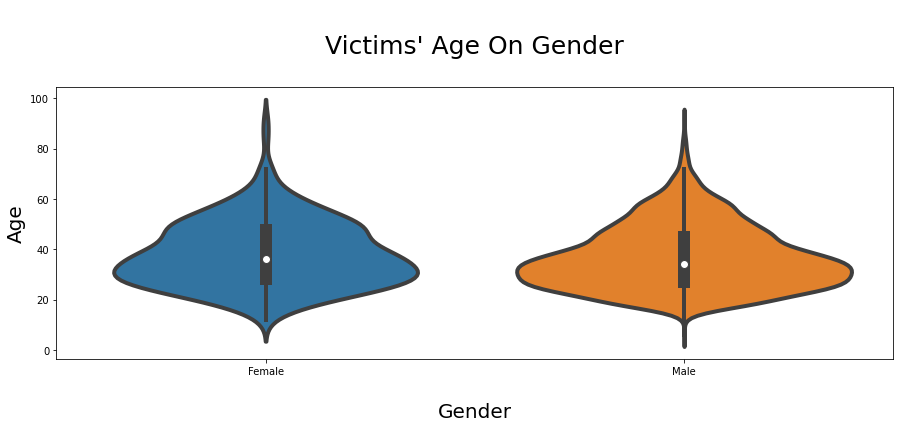

In [ ]:
print("Let's have a look on the distribution of genderwise victims' age :")
plt.subplots(figsize=(15, 5))

p=sns.violinplot(data=data,x="Gender",y="Age",order=data["Gender"].value_counts(ascending=True).index,linewidth=4,edgecolor="black")
p.axes.set_title("\nVictims' Age On Gender\n",fontsize=25)
p.axes.set_xlabel("\nGender",fontsize=20)
p.axes.set_ylabel("Age",fontsize=20)

plt.show()


We can observe the distribution of the age of the victims. Both the figures above, show that the distribution of age for both genders is between 20 - 40 years roughly. 

## Location 

Since, we have made some observations regarding trends related to race, we will now analyse the trends (if any) related to the location of the shooting. 

Let's have a look on the states of occurances :


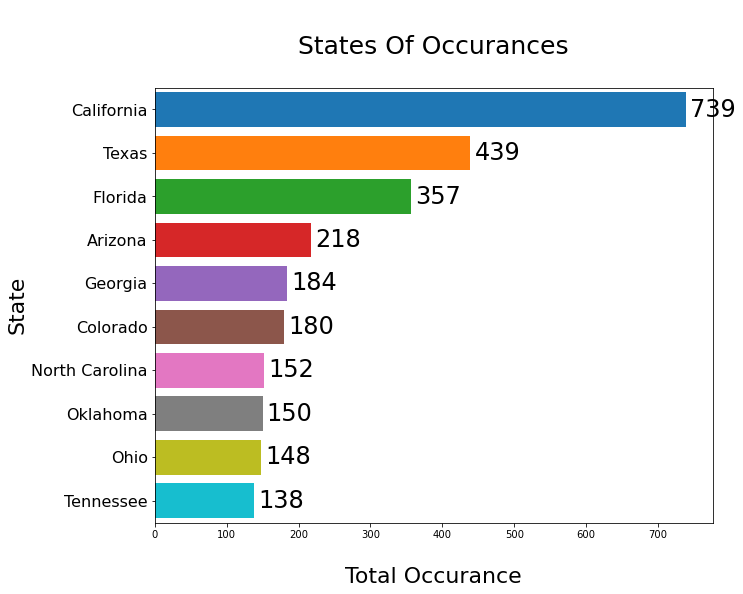

In [ ]:

print("Let's have a look on the states of occurances :")
plt.subplots(figsize=(10, 8))
p=sns.countplot(y=data["State"],order=data["State"].value_counts(ascending=False).index[:10], saturation=1, linewidth = 5)
p.axes.set_title("\nStates Of Occurances\n",fontsize=25)
p.axes.set_ylabel("State",fontsize=22)
p.axes.set_xlabel("\nTotal Occurance",fontsize=22)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=16)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=24,color="black")
    

plt.show()

Here, we have only displayed the first 10 states since these are the states where most of the killings took place. After observing the countplot, we see no particular trends between the states and incidents that took place. California, Texas and Florida are the three states in the US with the most crime rate and therefore, more shootings taking place in these states. 
Furthermore, as we can see below, we observe similar trends when we only take **unarmed victims** into account. 

Let's have a look on the states of occurances for unarmed victims:


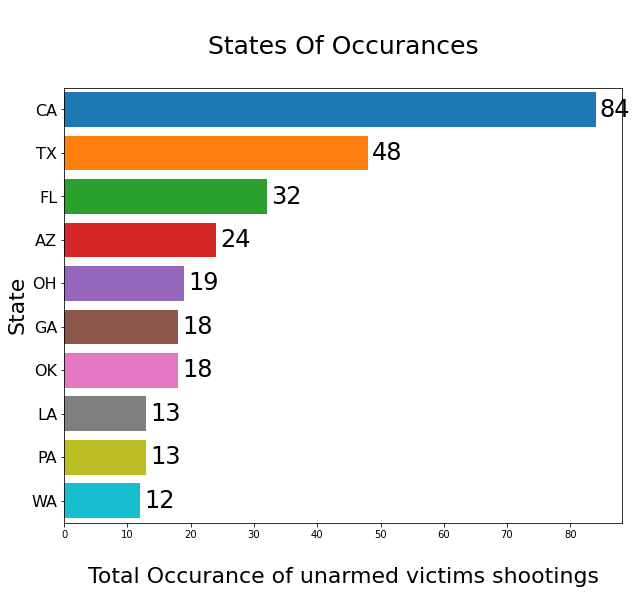

In [ ]:
print("Let's have a look on the states of occurances for unarmed victims:")
plt.subplots(figsize=(10, 8))
p=sns.countplot(y=mydata["state"],order=mydata["state"].value_counts(ascending=False).index[:10], saturation=1, linewidth = 5)
p.axes.set_title("\nStates Of Occurances\n",fontsize=25)
p.axes.set_ylabel("State",fontsize=22)
p.axes.set_xlabel("\nTotal Occurance of unarmed victims shootings",fontsize=22)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=16)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=24,color="black")
    

plt.show()

### Timeline 

Now, we will plot the shootings during the time period 2015 - 2022. We will do so to analyse any trends in the lineplot seen below. 

Let's have a look on the timeline of occurances :


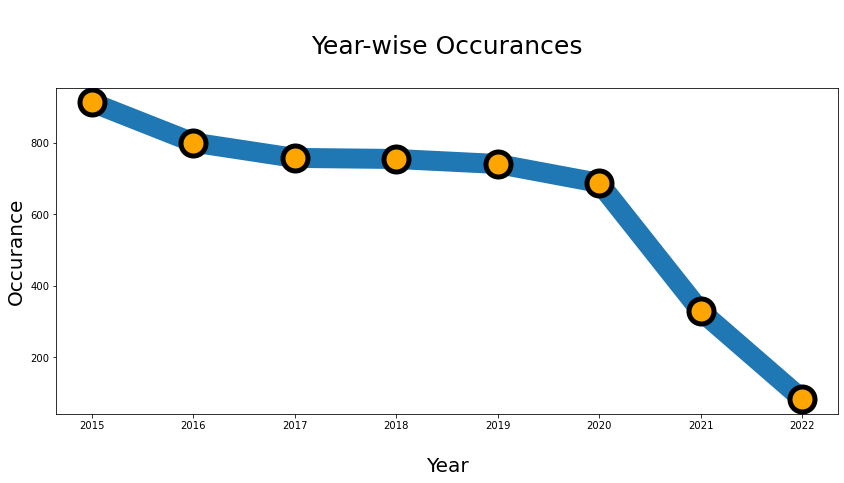

In [ ]:
print(f"Let's have a look on the timeline of occurances :")
plt.subplots(figsize=(14,6))

p=sns.lineplot(x=data["Year"].value_counts().index ,y=data["Year"].value_counts().values,marker="o",linewidth=20,markersize=25,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=5)
p.axes.set_title("\nYear-wise Occurances\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Occurance",fontsize=20)
plt.show()

As we can see, there is a big drop from 2020 - 2022. To understand a significant drop in the number of shootings, we would look into the situation of the U.S to determine what caused the drop. 


From 2020 - 2022, there was one signifcant event that took place in the U.S which could have impacted the trends in the number of shooting. It was known as the: 
- **Black Lives Matter (BLM) Movement:** BLM movement could have impacted the number of shootings in the States. After the tragic death of George Floyd, the movement spread awareness throughout the world about the racism prevalent in the system and the BLM protests may have this effect because they pushed police departments to adopt reforms such as body cams or community policing. Many cities with larger and more frequent BLM protests experienced greater declines in police homicides.

Although, there are other events that could have impacted the shootings from 2020-2022 such as the onset of the pandemic and the change in presidency in the States. I believe that the BLM movement had the greatest impact in reducing shootings and encouraging police reforms. The movement was directed towards the poilce unlike other events and therefore, they should have had the most impact.  

- **The onset of the pandemic:** The onset of the pandemic could have definetly impacted the shootings since the crime rate also reduced during the pandemic. Crime was less since people stayed mostly indoors and therefore, it could have decreased the shootings in the U.S.
- **The change in Presidency in the U.S:** Th change in presidency from Trump to Biden could also have impacted the number of shootings since Trump did not hold the poilce accountable whereas when Biden stepped in, he enforced more police reforms and was in support of the BLM movement which could have reduced the shootings in the U.S. 

## Conclusion

With the above data analysis and data vizualization, we can answer the following research questions:

**How many unarmed victims were shot?** 

After observing the trends in the dataset, we found that over 10% of the victims were unarmed. We then, analysed if these victims were fleeing and it showed that around 250 victims were unarmed and not fleeing, yet they were still shot. Additionally, over 359 unarmed victims were shot and the poilce were wearing no body cameras to give crebility to their statements. Therefore, this shows that the government needs more reforms and make wearing body cameras a necessity so that they can access the situation easily. 

**Are there any trends between trends between the race & age of the victims and the number of shootings ocurred?**

With the above visusals and data, we can observe that most unarmed victims were White followed by Black and Hispanics. In most cases,these do not necessarily show any trends since most the number of shooting of each race coincides with the population of the race in the country. However, we can see that almost 35% of the unarmed victims were black which is more than twice the population of black people in the country. This could imply that there is racism that exists within the country, however again, we can not access the situation accurately due to the unavailability of other datasbases. 


**Where (in which states) did the shootings occur?**

The shootings occurred in the states with the most crime rate in the United States therefore, there is are no major observations here since they coincide with the crime rate in the states. 

**Have the number of shootings in the United States decrease from 2015 - 2022?**

The number of shoootings gradually deacresed from 2015 - 2020 however, after that we observed a major dip in the number of shootings, this could be potentially because of the BLM protests in the country and other significant events such as the COVID-19 pandemic and awareness spread all over the world on the racism prevalent. 



Therefore, even though we have seen significant reduction in the number of shootings in the United States the past couple of years, we still need to see more reforms that protect the minorities and improve the effectiveness of the police. A more frequent use of body cams and community policing could really make a big difference within the country. 